In [96]:
#import Data 
import pandas as pd
df = pd.read_csv("titanic-passengers.csv",sep =';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [8]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
def drop_nan_columns(data, ratio=1.0)->pd.DataFrame:
    """
    The ratio parameter (0.0<=ratio<1.0) lets you drop columns which has 'ratio'% of nans. (i.e if ratio is 0.8 then all columns with 80% or more entries being nan get dropped)
    Returns a new dataframe
    """
    col_list = []
    na_df = data.isna()
    total_size = na_df.shape[0]
    for col in na_df:
        a = na_df[col].value_counts()
        if False not in a.keys():
            col_list.append(col)
        elif True not in a.keys():
            pass
        else:
            if a[True]/total_size >= ratio:
                col_list.append(col)
    print(f"{len(col_list)} columns dropped- {col_list}")
    return data.drop(col_list, axis=1)

In [64]:
#supprimer les columns qui ont 60% des valeurs nulls
df =drop_nan_columns(df, ratio=0.6)

1 columns dropped- ['Cabin']


In [16]:
df['Age'].values

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 25.  , 24.  , 48.  , 37.  ,   nan, 17.  , 27.  , 17.  ,
       32.  , 38.  ,   nan, 45.  , 32.  , 30.5 , 41.  , 48.  , 60.  ,
       50.  , 24.  , 17.  , 19.  , 25.  ,   nan, 45.  , 30.  , 40.  ,
       34.  , 28.  , 36.  ,  3.  , 40.  , 32.  , 34.  , 16.  , 42.  ,
         nan, 25.  ,  7.  , 23.  , 28.  ,   nan, 50.  ,   nan, 32.  ,
       32.  , 44.  ,   nan, 70.5 , 25.  , 30.  , 22.  , 41.  , 30.  ,
       27.  ,  7.  , 31.  , 20.  , 27.  , 30.  , 48.  , 26.  , 19.  ,
       27.  , 28.  , 19.  , 40.  , 35.  ,   nan,   nan, 26.  ,   nan,
         nan,  0.67, 24.  ,   nan, 20.  , 26.  , 36.  , 62.  ,   nan,
       31.  , 43.  , 38.  , 18.  ,   nan,   nan, 33.  ,   nan,   nan,
         nan,   nan,   nan,  2.  , 27.  , 30.  , 38.  ,   nan,   nan,
         nan, 24.  , 40.  ,  3.  , 39.  , 25.  , 29.  ,   nan, 17.  ,
       20.  , 34.  , 22.  , 22.  , 19.  , 55.  , 56.  , 45.  , 28.  ,
       32.  , 20.  ,

In [27]:
df['Age'].median()

28.0

In [65]:
#fill the nan with the median of age
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Age'].values


array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 25.  , 24.  , 48.  , 37.  , 28.  , 17.  , 27.  , 17.  ,
       32.  , 38.  , 28.  , 45.  , 32.  , 30.5 , 41.  , 48.  , 60.  ,
       50.  , 24.  , 17.  , 19.  , 25.  , 28.  , 45.  , 30.  , 40.  ,
       34.  , 28.  , 36.  ,  3.  , 40.  , 32.  , 34.  , 16.  , 42.  ,
       28.  , 25.  ,  7.  , 23.  , 28.  , 28.  , 50.  , 28.  , 32.  ,
       32.  , 44.  , 28.  , 70.5 , 25.  , 30.  , 22.  , 41.  , 30.  ,
       27.  ,  7.  , 31.  , 20.  , 27.  , 30.  , 48.  , 26.  , 19.  ,
       27.  , 28.  , 19.  , 40.  , 35.  , 28.  , 28.  , 26.  , 28.  ,
       28.  ,  0.67, 24.  , 28.  , 20.  , 26.  , 36.  , 62.  , 28.  ,
       31.  , 43.  , 38.  , 18.  , 28.  , 28.  , 33.  , 28.  , 28.  ,
       28.  , 28.  , 28.  ,  2.  , 27.  , 30.  , 38.  , 28.  , 28.  ,
       28.  , 24.  , 40.  ,  3.  , 39.  , 25.  , 29.  , 28.  , 17.  ,
       20.  , 34.  , 22.  , 22.  , 19.  , 55.  , 56.  , 45.  , 28.  ,
       32.  , 20.  ,

In [31]:
df['Age'].isnull().sum()

0

In [32]:
df['Embarked'].values

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'C', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'Q', 'C', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'Q', 'Q', 'S', 'S',
       'C', 'S', 'Q', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'Q',
       'Q', 'S', 'Q', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S

In [66]:
#fill the nan with the previous values of embarked
df['Embarked'].fillna(method = 'backfill', inplace = True)


In [36]:
df['Embarked'].values

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'C', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'Q', 'C', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'Q', 'Q', 'S', 'S',
       'C', 'S', 'Q', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S',
       'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'Q',
       'Q', 'S', 'Q', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S

In [67]:
##convert column Embarked into numerical
cleanup = {"Embarked" : { 'S' : 0 , 'C' : 1, 'Q' : 2 }}
df.replace (cleanup, inplace = True )


In [44]:
df['Embarked'].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [68]:
#delete axis name
df.drop( 'Name', axis= 1, inplace= True)

In [70]:
##delete axis ticket
df.drop( 'Ticket', axis= 1, inplace= True)

KeyError: "['Ticket'] not found in axis"

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [71]:
#convert column survived into numerical
cleanup = {"Survived" : { 'No' : 0 , 'Yes' : 1}}
df.replace (cleanup, inplace = True )

In [122]:
#convert column Sex into numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex']= encoder.fit_transform(df['Sex'])
df['Sex'].values

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


<AxesSubplot:>

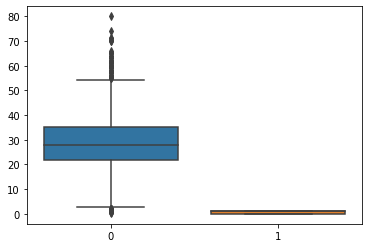

In [75]:
#data visualization
#correlation between Sex and Age
import matplotlib.pyplot as plt
import seaborn as sns
columns = (df["Age"], df["Sex"])
sns.boxplot(data= columns)

<AxesSubplot:>

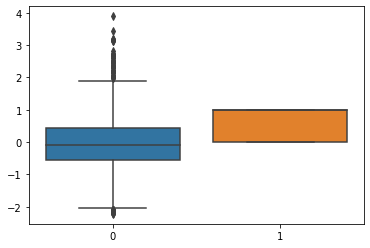

In [76]:
#standardization
from sklearn.preprocessing import  StandardScaler
scaler=  StandardScaler()
df['Age']= scaler.fit_transform(df[['Age']].values)
df['Sex'] =scaler.fit_transform(df[['Sex']].values)
sns.boxplot(data = columns)

<AxesSubplot:>

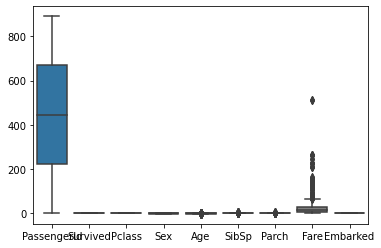

In [77]:
sns.boxplot(data = df)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

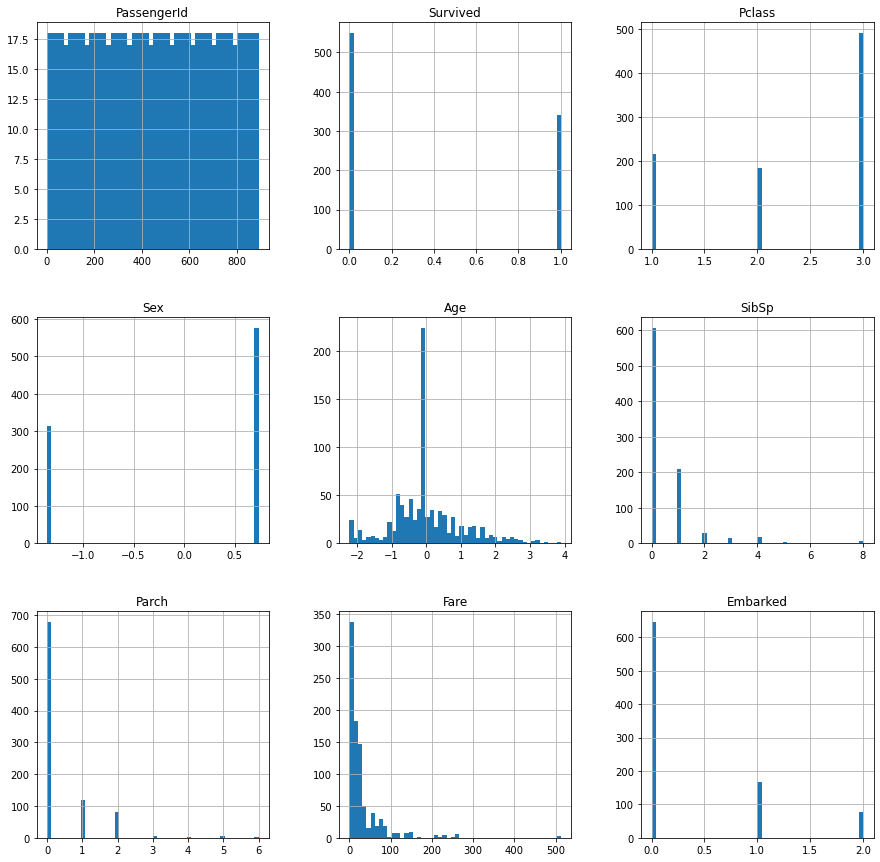

In [79]:
df.hist (bins=50, figsize=(15,15))

In [83]:
df[["Age", "Survived"]].groupby(["Age"], as_index=True).mean()

,Survived
Age,
-2.224156,1.0
-2.204944,1.0
-2.198796,1.0
-2.192648,1.0
-2.185731,1.0
...,...
3.123056,0.0
3.161481,0.0
3.199906,0.0


In [84]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

'This function create a correlation matrix  heatmap that shows the correlation between all the columns of our data. To make it more clear and visible, it uses numbers and colors, Blue for negative and red for positivie in the range of [-1.0,1.0].  '

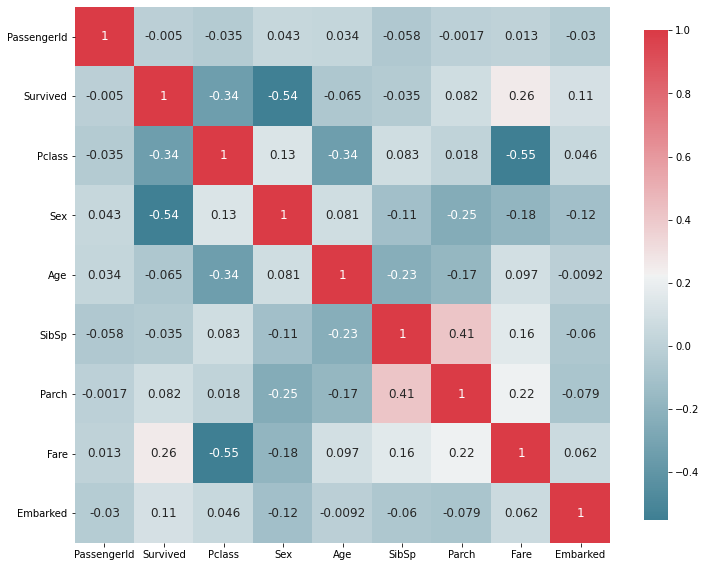

In [86]:
plot_correlation_map(df)
"""This function create a correlation matrix heatmap that shows the correlation between all the columns of our data.
To make it more clear and visible, it uses numbers and colors, Blue for negative and red for positivie in the range of [-1.0,1.0]. 
The stronger the color, the larger the correlation magnitude."""

In [87]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [97]:
X = df['Name'].str.split(',',n = 3, expand = True)
X

,0,1
0,Collander,Mr. Erik Gustaf
1,Moen,Mr. Sigurd Hansen
2,Jensen,Mr. Hans Peder
3,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,Davidson,Mr. Thornton
...,...,...
886,Nasser,Mrs. Nicholas (Adele Achem)
887,Sirayanian,Mr. Orsen
888,Cacic,Miss. Marija
889,Petroff,"Mr. Pastcho (""Pentcho"")"


In [100]:
Title = X[1].str.split('.', expand = True)


In [101]:
Title

,0,1,2
0,Mr,Erik Gustaf,None
1,Mr,Sigurd Hansen,None
2,Mr,Hans Peder,None
3,Mrs,Nils (Alma Cornelia Berglund),None
4,Mr,Thornton,None
...,...,...,...
886,Mrs,Nicholas (Adele Achem),None
887,Mr,Orsen,None
888,Miss,Marija,None
889,Mr,"Pastcho (""Pentcho"")",None


In [109]:
#delete 2 columns
Title.drop(Title.columns[[1,2]], axis = 1, inplace = True)

In [110]:
Title

,0
0,Mr
1,Mr
2,Mr
3,Mrs
4,Mr
...,...
886,Mrs
887,Mr
888,Miss
889,Mr


In [112]:
df = pd.concat([df, Title], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [120]:
#rename the column 0 by Title
df.rename(columns={0: 'Title'},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [123]:
df[["Title", "Sex"]].groupby(["Title"], as_index=True).mean()

,Sex
Title,
Capt,1.000000
Col,1.000000
Don,1.000000
Dr,0.857143
Jonkheer,1.000000
Lady,0.000000
Major,1.000000
Master,1.000000
Miss,0.000000


In [127]:
#concat 2 columns
Familysize = df["SibSp"] + df["Parch"]
Familysize

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Length: 891, dtype: int64

In [130]:
# creat a new column
df["Familysize"]= Familysize
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S,Mr,0
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S,Mr,0
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S,Mrs,4
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,1
887,61,No,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,NaN,C,Mr,0
888,535,No,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,NaN,S,Miss,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,349215,7.8958,NaN,S,Mr,0


In [142]:
Title_Dictionary = {"Title": {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty", "Mme":"Miss", "Mlle":"Miss", "Miss" : "Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" : "Mrs" , "Master" : "Master" }  }

In [144]:
df.replace (Title_Dictionary , inplace = True )
df['Title'].values

array([' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr',
       ' Mrs', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr',
       ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Mr',
       ' Dr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Major', ' Mrs',
       ' Don', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr',
       ' Miss', ' Mr', ' Miss', ' Mr', ' Master', ' Dr', ' Mr', ' Mr',
       ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr',
       ' Mrs', ' Mrs', ' Miss', ' Miss', ' Master', ' Miss', ' Mr',
       ' Rev', ' Mr', ' Mrs', ' Mrs', ' Miss', ' Mr', ' Mrs', ' Mr',
       ' Mr', ' Miss', ' Mr', ' Miss', ' Miss', ' Miss', ' Mrs',
       ' Master', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr',
       ' Mrs', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Miss',
       ' Mrs', ' Mr', ' Mr', ' Mr', ' Master', ' Mr', ' Mr', ' Mr', ' Mr',
       ' Mrs', ' Miss', ' Mr', ' Mr', ' Master', ' Mr', ' Mr', ' Mr',
       ' Mr', ' 